In [1]:
import $ivy.`org.apache.spark::spark-sql:2.4.3`


import org.apache.spark.sql._
import org.apache.spark.sql.functions._


//Reducir numero logs
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)


//For adding extra dependenies
import $ivy.`org.typelevel::cats-core:1.6.0`

//Plotly
import $ivy.`org.plotly-scala::plotly-almond:0.7.1`
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

import $ivy.$                                  



import org.apache.spark.sql._

import org.apache.spark.sql.functions._


//Reducir numero logs

import org.apache.log4j.{Level, Logger}

import $ivy.$                               

//Plotly

import $ivy.$                                      

import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

### Inicio Spark Session y Algunos métodos para descargar los datos

In [2]:
//Iniciamos session de Spark
val spark = {
  NotebookSparkSession.builder()
    .appName("AnalisisMercadoEnergia")
    .master("local[*]")
    .getOrCreate()
}
import spark.implicits._

Loading spark-stubs
Getting spark JARs
Creating SparkSession


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties


Spark UI

spark: SparkSession = org.apache.spark.sql.SparkSession@3a2651b3
import spark.implicits._

# Carga de datos
Datos diarios del balance electrico a nivel nacional

In [3]:
val filePath = "data/ModelosCsv/datasetMercados14-24.csv"
val dataFrameMercados: DataFrame = spark.read
  .option("header", "true") // Si el archivo tiene un encabezado
  .option("inferSchema", "true") // Para inferir automáticamente el esquema
  .csv(filePath)

val dfMercados = dataFrameMercados.orderBy("Fecha")

csv at cmd2.sc:5

200 / 200

csv at cmd2.sc:5

1 / 1

csv at cmd2.sc:5

8 / 8

filePath: String = "data/ModelosCsv/datasetMercados14-24.csv"
dataFrameMercados: DataFrame = [Fecha: timestamp, Valor_PVPC: double ... 3 more fields]
dfMercados: Dataset[Row] = [Fecha: timestamp, Valor_PVPC: double ... 3 more fields]

collect at cmd3.sc:8

8 / 8

collect at cmd3.sc:8

8 / 8

collect at cmd3.sc:8

200 / 200

collect at cmd3.sc:8

200 / 200

collect at cmd3.sc:8

200 / 200

collect at cmd3.sc:8

11 / 11

collect at cmd3.sc:9

8 / 8

collect at cmd3.sc:9

8 / 8

collect at cmd3.sc:9

200 / 200

collect at cmd3.sc:9

200 / 200

collect at cmd3.sc:9

200 / 200

collect at cmd3.sc:9

11 / 11

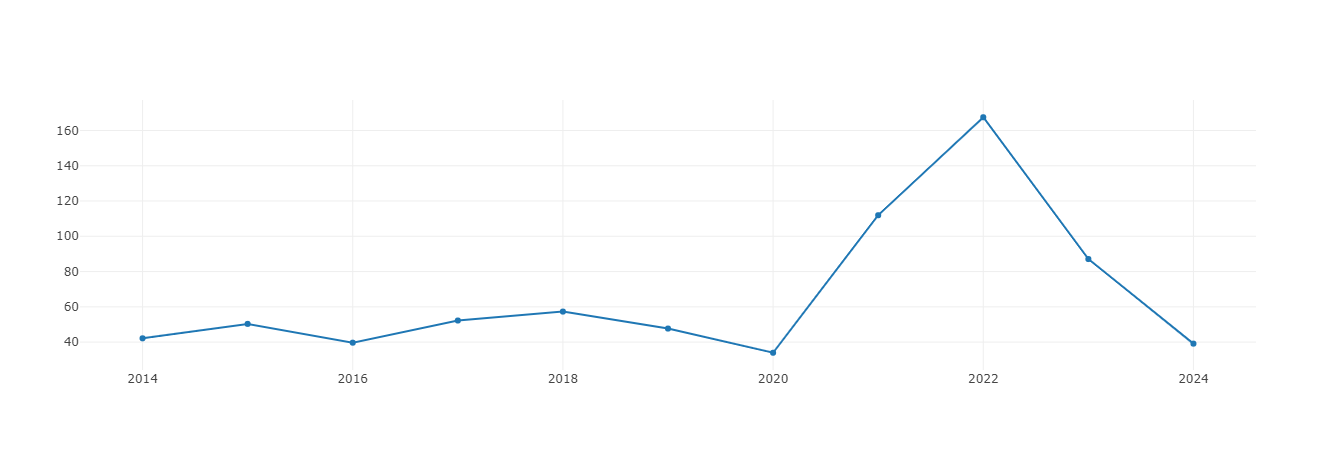

defined function precioHistoricoAnual
res3_1: String = "plot-919b5d14-e2fc-42ee-8d5c-823c97c56aa5"

In [4]:
def precioHistoricoAnual = {
val dfPromedioAnual = dfMercados
    .filter(date_format(col("Fecha"), "yyyy") =!= 2013)
    .groupBy(date_format(col("Fecha"), "yyyy").as("Año"))
    .agg(avg("Valor_Mercado_Spot").as("ValorPromedioAño"))
    .orderBy(col("Año"))

val seqPrecioEnergia = dfPromedioAnual.select("ValorPromedioAño").as[Double].collect.toSeq
val seqAños = dfPromedioAnual.select("Año").as[String].collect.toSeq

val trace =  Scatter(seqAños, seqPrecioEnergia, name = "€/MWh")
     
val data = Seq(trace)
plot(data)
}
precioHistoricoAnual

collect at cmd5.sc:8

8 / 8

collect at cmd5.sc:8

8 / 8

collect at cmd5.sc:8

200 / 200

collect at cmd5.sc:8

200 / 200

collect at cmd5.sc:8

200 / 200

collect at cmd5.sc:8

24 / 24

collect at cmd5.sc:9

8 / 8

collect at cmd5.sc:9

8 / 8

collect at cmd5.sc:9

200 / 200

collect at cmd5.sc:9

200 / 200

collect at cmd5.sc:9

200 / 200

collect at cmd5.sc:9

24 / 24

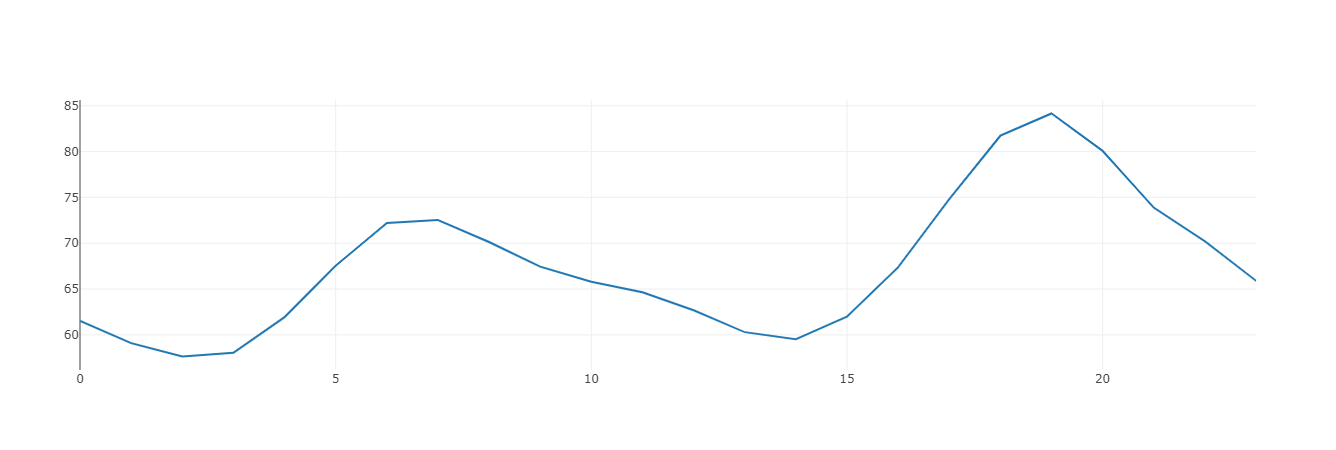

defined function precioHistoricoPromedioPorHora
res5_1: String = "plot-8f49bc04-51de-4fec-b3c2-79a5fb5375ad"

In [6]:
def precioHistoricoPromedioPorHora = {
    val df = dfMercados
        .select("Valor_Mercado_Spot", "Fecha")
        .groupBy(date_format(col("Fecha"), "HH").as("Hora"))
        .agg(avg("Valor_Mercado_Spot").as("PromedioPorHora"))
        .orderBy(col("Hora"))

    val seqPrecioEnergia = df.select("PromedioPorHora").as[Double].collect.toSeq
    val seqAños = df.select("Hora").as[String].collect.toSeq

    val trace =  Scatter(seqAños, seqPrecioEnergia, name = "€/MWh")
     
    val data = Seq(trace)
    plot(data)
}
precioHistoricoPromedioPorHora

collect at cmd4.sc:8

8 / 8

collect at cmd4.sc:8

8 / 8

collect at cmd4.sc:8

200 / 200

collect at cmd4.sc:8

200 / 200

collect at cmd4.sc:8

200 / 200

collect at cmd4.sc:8

12 / 12

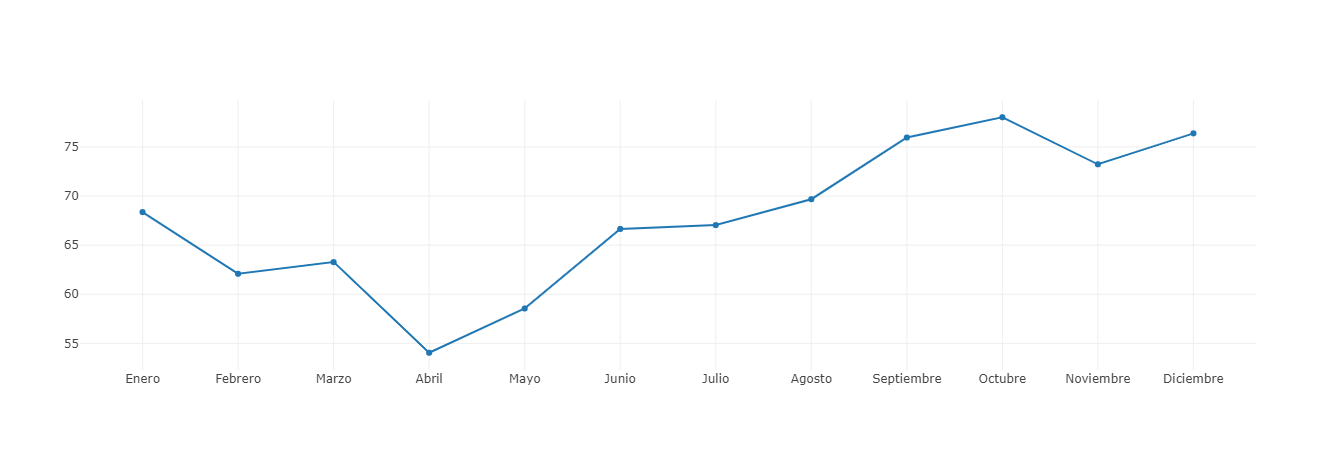

defined function precioHistoricoPromedioMensual
res4_1: String = "plot-27cd0424-4234-4a5c-a974-7078f5939f21"

In [5]:
def precioHistoricoPromedioMensual = {
val df = dfMercados
    .select("Valor_Mercado_Spot", "Fecha")
    .groupBy(date_format(col("Fecha"), "MM").as("Mes"))
    .agg(avg("Valor_Mercado_Spot").as("PromedioMensual"))
    .orderBy(col("Mes"))

val seqPrecioEnergia = df.select("PromedioMensual").as[Double].collect.toSeq
val seqMeses = Seq("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")


val trace =  Scatter(seqMeses, seqPrecioEnergia, name = "€/MWh")
     
val data = Seq(trace)
plot(data)
}
precioHistoricoPromedioMensual

### Cargamos también datos balance para comparar

In [7]:
val filePath = "data/ModelosCsv/datasetTotalBalanceNacional11-24.csv"
val dataFrameBalance: DataFrame = spark.read
  .option("header", "true") // Si el archivo tiene un encabezado
  .option("inferSchema", "true") // Para inferir automáticamente el esquema
  .csv(filePath)

csv at cmd6.sc:5

1 / 1

csv at cmd6.sc:5

3 / 3

filePath: String = "data/ModelosCsv/datasetTotalBalanceNacional11-24.csv"
dataFrameBalance: DataFrame = [Familia: string, Tipo: string ... 6 more fields]

In [8]:
dataFrameBalance.show()

show at cmd7.sc:1

1 / 1

+---------+----------+-------------------+-------------------+----------+-------------------+--------+--------------+
|  Familia|      Tipo|      FechaCompleta|         Porcentaje|     Valor|                Dia|    Hora|BajasEmisiones|
+---------+----------+-------------------+-------------------+----------+-------------------+--------+--------------+
|Renovable|Hidráulica|2010-12-31 23:00:00|  0.730243950800116|132922.642|2010-12-31 00:00:00|23:00:00|          true|
|Renovable|Hidráulica|2011-01-01 23:00:00|0.46094258667156873| 122475.16|2011-01-01 00:00:00|23:00:00|          true|
|Renovable|Hidráulica|2011-01-02 23:00:00| 0.5886483989680635|146861.638|2011-01-02 00:00:00|23:00:00|          true|
|Renovable|Hidráulica|2011-01-03 23:00:00| 0.5383243444180309|145876.053|2011-01-03 00:00:00|23:00:00|          true|
|Renovable|Hidráulica|2011-01-04 23:00:00| 0.4184631870402314|158946.134|2011-01-04 00:00:00|23:00:00|          true|
|Renovable|Hidráulica|2011-01-05 23:00:00|0.299238302740

collect at cmd8.sc:15

8 / 8

collect at cmd8.sc:15

8 / 8

collect at cmd8.sc:15

200 / 200

collect at cmd8.sc:15

200 / 200

collect at cmd8.sc:15

200 / 200

collect at cmd8.sc:15

12 / 12

collect at cmd8.sc:16

3 / 3

collect at cmd8.sc:16

200 / 200

collect at cmd8.sc:16

200 / 200

collect at cmd8.sc:16

12 / 12

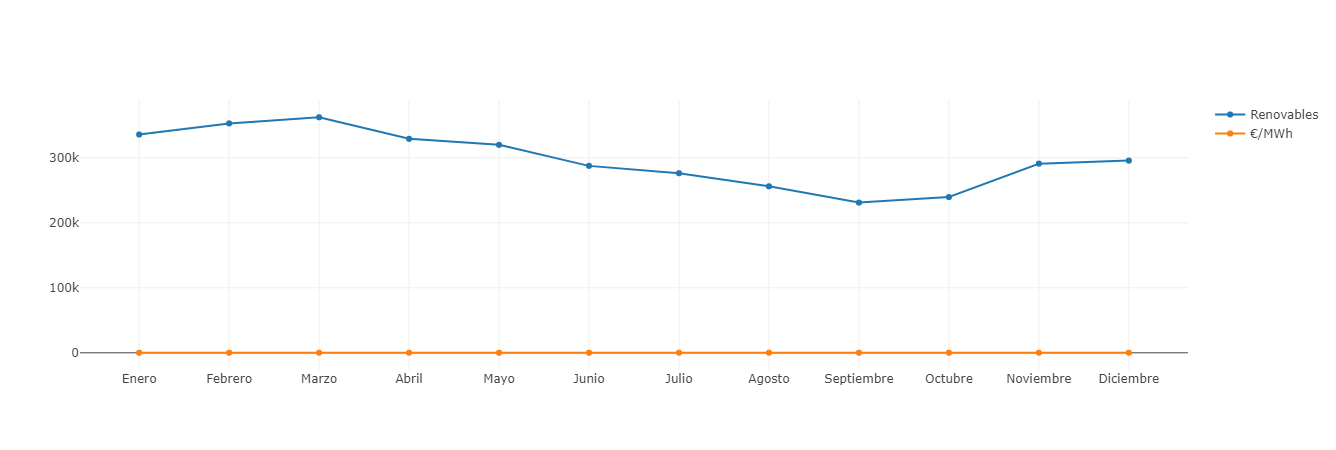

defined function precioMensualYGeneracionRenovable
res8_1: String = "plot-81a0bcf5-fe42-4e58-80f7-85c3bad1148a"

In [9]:
def precioMensualYGeneracionRenovable() = {
    
    val df = dfMercados
    .groupBy(date_format(col("Fecha"), "MM").as("Mes"))
    .agg(avg("Valor_Mercado_Spot").as("PromedioMensual"))
    .orderBy(col("Mes"))

    val dfRenovables = dataFrameBalance
        .filter(year(col("FechaCompleta")) > 2013)
        .filter($"Tipo" === "Generación renovable")
        .groupBy(month(col("FechaCompleta")).as("Mes"))
        .agg(avg("Valor").as("PromedioMensual"))
        .orderBy(col("Mes"))
    
    val seqPrecioEnergia = df.select("PromedioMensual").as[Double].collect.toSeq
    val seqGeneracionRenovable = dfRenovables.select("PromedioMensual").as[Double].collect.toSeq
    val seqMeses = Seq("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")

    
    //val tracePrecios = Scatter(seqMeses, seqPrecioEnergia, name = "€/MWh")
    val traceMercados =  Scatter(seqMeses, seqPrecioEnergia, name = "€/MWh")
    val traceRenovables = Scatter(seqMeses, seqGeneracionRenovable, name = "Renovables")

    val data = Seq(traceRenovables, traceMercados)
    plot(data)

}

// Llamar a la función
precioMensualYGeneracionRenovable()